<a href="https://colab.research.google.com/github/yeonshiri/AGS/blob/main/code/yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# yolov5 불러와서 실행하기
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17485, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 17485 (delta 76), reused 29 (delta 29), pack-reused 17380 (from 4)
Receiving objects: 100% (17485/17485), 16.35 MiB | 18.54 MiB/s, done.
Resolving deltas: 100% (11987/11987), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s

In [ ]:
from google.colab import files
uploaded = files.upload()
!unzip dataset.zip

Saving dataset.zip to dataset.zip
Archive:  dataset.zip
  inflating: images/train/image_shortanswer_0_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_0_roi1_class1.jpg  
  inflating: images/train/image_shortanswer_10_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_11_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_11_roi2_class1.jpg  
  inflating: images/train/image_shortanswer_12_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_12_roi1_class1.jpg  
  inflating: images/train/image_shortanswer_13_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_13_roi1_class1.jpg  
  inflating: images/train/image_shortanswer_14_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_14_roi1_class1.jpg  
  inflating: images/train/image_shortanswer_15_roi1_class1.jpg  
  inflating: images/train/image_shortanswer_16_roi0_class1.jpg  
  inflating: images/train/image_shortanswer_16_roi1_class1.jpg  
  inflating: images/train/image_shor

In [ ]:
!ls   # 이걸로 data.yaml,images, labels 있는지 확인

benchmarks.py	 dataset.zip  images	   pyproject.toml    segment
CITATION.cff	 data.yaml    labels	   README.md	     train.py
classify	 detect.py    LICENSE	   README.zh-CN.md   tutorial.ipynb
CONTRIBUTING.md  export.py    models	   requirements.txt  utils
data		 hubconf.py   __pycache__  runs		     val.py


In [ ]:
!mv data.yaml.txt data.yaml

In [ ]:
# class를 0으로 일괄되게 바꿔주는 코드

import os

def convert_class2_to_class0(label_dir):
    for file_name in os.listdir(label_dir):
        if file_name.endswith(".txt"):
            path = os.path.join(label_dir, file_name)
            with open(path, "r") as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    parts[0] = "0"  # class 번호를 무조건 0으로
                    new_lines.append(" ".join(parts) + "\n")

            with open(path, "w") as f:
                f.writelines(new_lines)

# 적용
convert_class2_to_class0("labels/train")
convert_class2_to_class0("labels/valid")


In [ ]:
%%writefile data.yaml
train: ../images/train
val: ../images/valid

nc: 1
names: ['answer_box']

Overwriting data.yaml


In [ ]:
!cat data.yaml

train: ../images/train
val: ../images/valid

nc: 1
names: ['answer_box']


In [ ]:
# yolov5 모델들 train 실행하는 코드.

!python train.py --img 960 --batch 8 --epochs 100 \
--data data.yaml \
--cfg models/yolov5n.yaml \
--weights yolov5n.pt \
--name number_detector

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
       5/99      2.57G    0.06151    0.02345          0         14        960:  92% 22/24 [00:06<00:00,  3.28it/s]/content/yolov5/train.py:413: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       5/99      2.57G    0.06177    0.02352          0         17        960:  96% 23/24 [00:06<00:00,  3.02it/s]/content/yolov5/train.py:413: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       5/99      2.57G     0.0625    0.02361          0         15        960: 100% 24/24 [00:06<00:00,  3.52it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:00<00:00,  3.12it/s]
                   all         21         21      0.187      0.619      0.294      0.124

      Epoch    GPU_mem   bo

In [ ]:
import os

val_dir = 'images/valid'
val_imgs = os.listdir(val_dir)
print(val_imgs[:10])  # 앞 10개만 보기

['image_shortanswer_54_roi1_class1.jpg', 'image_shortanswer_73_roi1_class1.jpg', 'image_shortanswer_18_roi1_class1.jpg', 'image_shortanswer_83_roi0_class1.jpg', 'image_shortanswer_8_roi1_class1.jpg', 'image_shortanswer_15_roi0_class1.jpg', 'image_shortanswer_58_roi0_class1.jpg', 'image_shortanswer_11_roi1_class1.jpg', 'image_shortanswer_92_roi2_class1.jpg', 'image_shortanswer_27_roi1_class1.jpg']


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-18 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5n summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 942x698 1 answer_box
Speed: 7.9ms pre-process, 9.1ms inference, 1.9ms NMS per image at shape (1, 3, 640, 480)


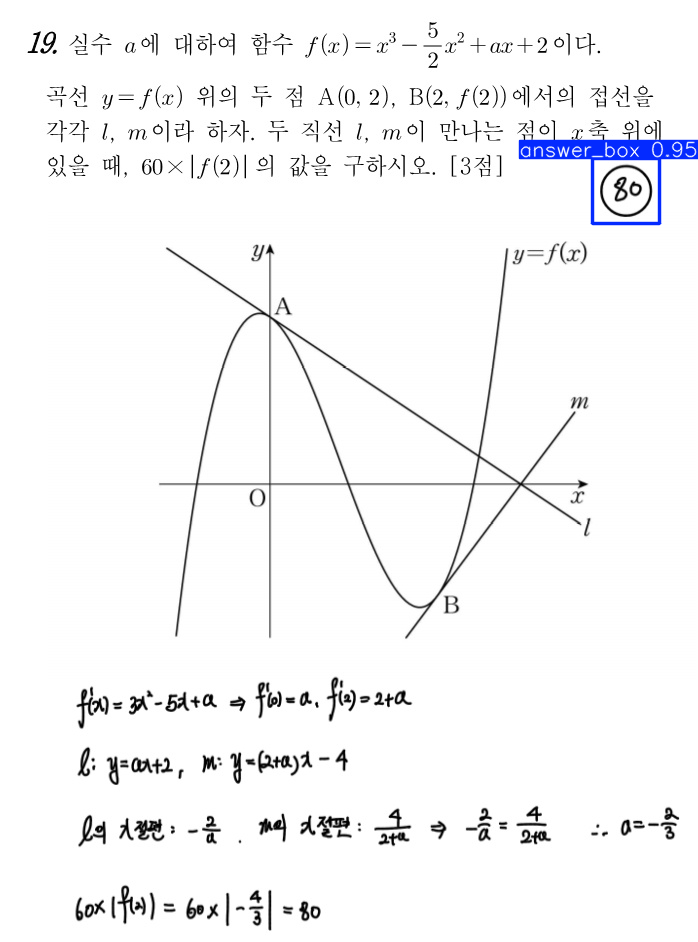

In [ ]:
# from google.colab import files
# uploaded = files.upload()

import torch
import os
import glob

# runs/detect 하위의 exp* 폴더 모두 찾기
folders = glob.glob('/content/yolov5/runs/train/number_detector*')
latest_folder = max(folders, key=os.path.getmtime)

model = torch.hub.load('ultralytics/yolov5', 'custom',
                       path=f'{latest_folder}/weights/best.pt')


# 예시 이미지 파일명으로 수정
val_dir = 'images/valid'
val_imgs = os.listdir(val_dir)
img_path = f'{val_dir}/{val_imgs[8]}'

# 추론
results = model(img_path)
results.print()     # 예측된 class, confidence 출력
results.show()      # bounding box 그려진 이미지 출력

In [ ]:
# ------------------------------------------------------------------------------------------------
# 이미 사전학습된 weight best.pt file 이용해서 바로 inference하기

from google.colab import files
uploaded = files.upload()  # 사전학습 weight인 best.pt file upload
print("best.pt 업로드")

Saving best.pt to best.pt


In [ ]:
# 잘 upload 되었는지 확인하기

import os
print(os.listdir('/content'))

['.config', 'roi_outputs', 'image_val_72.jpg', 'yolov5', 'best.pt', 'sample_data']


In [ ]:
from google.colab import files
import shutil
uploaded = files.upload()  # 추론할 이미지 upload
image_filename = list(uploaded.keys())[0]  # 업로드된 첫 번째 이미지 이름
if not os.path.exists(f'/content/{image_filename}'):
    shutil.move(image_filename, f'/content/{image_filename}')

image_path = f'/content/{image_filename}'
image_basename = os.path.splitext(image_filename)[0]  # 확장자 제거 → myimage
print("추론할 이미지 업로드")

Saving image_val_83.jpg to image_val_83.jpg
🖼️ 추론할 이미지 업로드


In [ ]:
# bounding box 추론하기

!python detect.py --weights /content/best.pt --img 1280 --conf 0.25 --source $image_path --save-txt --save-conf

detect: weights=['/content/best.pt'], source=/content/image_val_83.jpg, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5n summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/1 /content/image_val_83.jpg: 1280x928 2 0s, 28.3ms
Speed: 1.5ms pre-process, 28.3ms inference, 124.6ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to runs/detect/exp2
1 labels saved to runs/detect/exp2/labels


In [ ]:
# yolo로 추론된 bounding box의 image file, 좌표 txt file을 이용해서 ROI 추출하기
import cv2
import os
import glob

# runs/detect 하위의 exp* 폴더 모두 찾기
exp_folders = glob.glob('/content/yolov5/runs/detect/exp*')
latest_exp = max(exp_folders, key=os.path.getmtime)

# 이미지와 라벨 경로 설정
label_path = os.path.join(latest_exp, 'labels', f'{image_basename}.txt')
output_dir = '/content/roi_outputs'
os.makedirs(output_dir, exist_ok=True)    # 이미 있으면 이 코드 주석 처리

# 원본 이미지 불러오기
image = cv2.imread(image_path)
h, w = image.shape[:2]

# 라벨 파일 읽기 (YOLO format: class_id x_center y_center width height)
with open(label_path, 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    parts = line.strip().split()
    x_center, y_center, width, height = map(float, parts[1:5])  # class, conf 제외

    # YOLO 좌표 -> 이미지 좌표로 변환
    x1 = int((x_center - width / 2) * w)
    y1 = int((y_center - height / 2) * h)
    x2 = int((x_center + width / 2) * w)
    y2 = int((y_center + height / 2) * h)

    # ROI 추출
    roi = image[y1:y2, x1:x2]

    # ROI 저장
    roi_filename = f'roi_{i}.jpg'
    roi_path = os.path.join(output_dir, roi_filename)
    cv2.imwrite(roi_path, roi)

print(f"ROI 저장 완료! 총 {len(lines)}개 생성됨.")

✅ ROI 추출 완료! 총 0개 저장됨.
